# Atividade Ativa - ADS

https://drive.google.com/file/d/1UrlwBHa47H5lpAkLtDsfuEWfTMQj491X/view?usp=sharing

In [87]:
import requests
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


orig_url='https://drive.google.com/file/d/1UrlwBHa47H5lpAkLtDsfuEWfTMQj491X/view?usp=sharing'


file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df_servidores = pd.read_csv(csv_raw,sep=';',low_memory=False)
pd.set_option('display.max_rows', None)
df_servidores['BRUTO'] = df_servidores['BRUTO'].str.replace(',', '').astype(float)
df_servidores['LÍQUIDO'] = df_servidores['LÍQUIDO'].str.replace(',', '').astype(float)   
df_servidores['REMUNERAÇÃO BÁSICA'] = df_servidores['REMUNERAÇÃO BÁSICA'].str.replace(',', '').astype(float)   
df_servidores['IRRF'] = df_servidores['IRRF'].str.replace(',', '.').astype(float)

1) Qual o espaço amostral compreendido nesta base de dados?

In [88]:
df_servidores.shape[0]
# 237125

237125

2) Quantos servidores estão lotados no corpo de bombeiros?

In [89]:
df_servidores.value_counts('ÓRGÃO')['CORPO DE BOMBEIRO MILITAR DO DISTRITO FEDERAL - SIAPE']

12434

3) Qual o órgão público com maior número de funcionários?

In [90]:
# SECRETARIA DE ESTADO DE EDUCACAO  
orgao_maior_numero = df_servidores['ÓRGÃO'].value_counts().idxmax()
orgao_maior_numero


'SECRETARIA DE ESTADO DE EDUCACAO                                                '

4) Qual a probabilidade de ao escolher uma linha ao acaso, ser de um funcionário que trabalha na secretaria de educação?

In [91]:
# 27.886557722720084
(66126/237125) * 100

27.886557722720084

5) Liste todas as funções contidas na base.

In [92]:
df_servidores['FUNÇÃO'].value_counts()

FUNÇÃO
                                                                                         161108
S/NIVEL FUNCAO                                                                            31662
S/ATIVIDADE FUNCAO                                                                         8081
ASSESSOR                                                                                   2340
GERENTE                                                                                    1779
CHEFE                                                                                      1614
ASSESSOR ESPECIAL                                                                          1597
ASSESSOR TECNICO                                                                           1582
DIRETOR                                                                                    1561
SUPERVISOR                                                                                 1064
SEM FUNCAO                       

6) Qual órgão publico possui a maior média salarial?

In [93]:
orgao_maior_media_salarial = df_servidores.groupby('ÓRGÃO')['BRUTO'].mean().idxmax()
orgao_maior_media_salarial

'BRB-CRED, FINANC. E INV. S.A.'

7) O servidor com maior remuneração básica pertence a qual órgão?

In [94]:
servidor_maior_remuneracao_basica = df_servidores[df_servidores['REMUNERAÇÃO BÁSICA'] == df_servidores['REMUNERAÇÃO BÁSICA'].max()]
servidor_maior_remuneracao_basica['ÓRGÃO'].iloc[0]



'CAESB - COMPANHIA DE SANEAMENTO AMBIENTAL DO DISTRITO FEDERAL'

8) Qual o valor pago para todos os funcionários públicos? Pontuação (1 Ponto)

In [95]:
f'R$ {df_servidores['BRUTO'].sum()}'

'R$ 228494720517.0'

9) Elabore um gráfico de pizza com a remuneração bruta dos servidores por orgão.

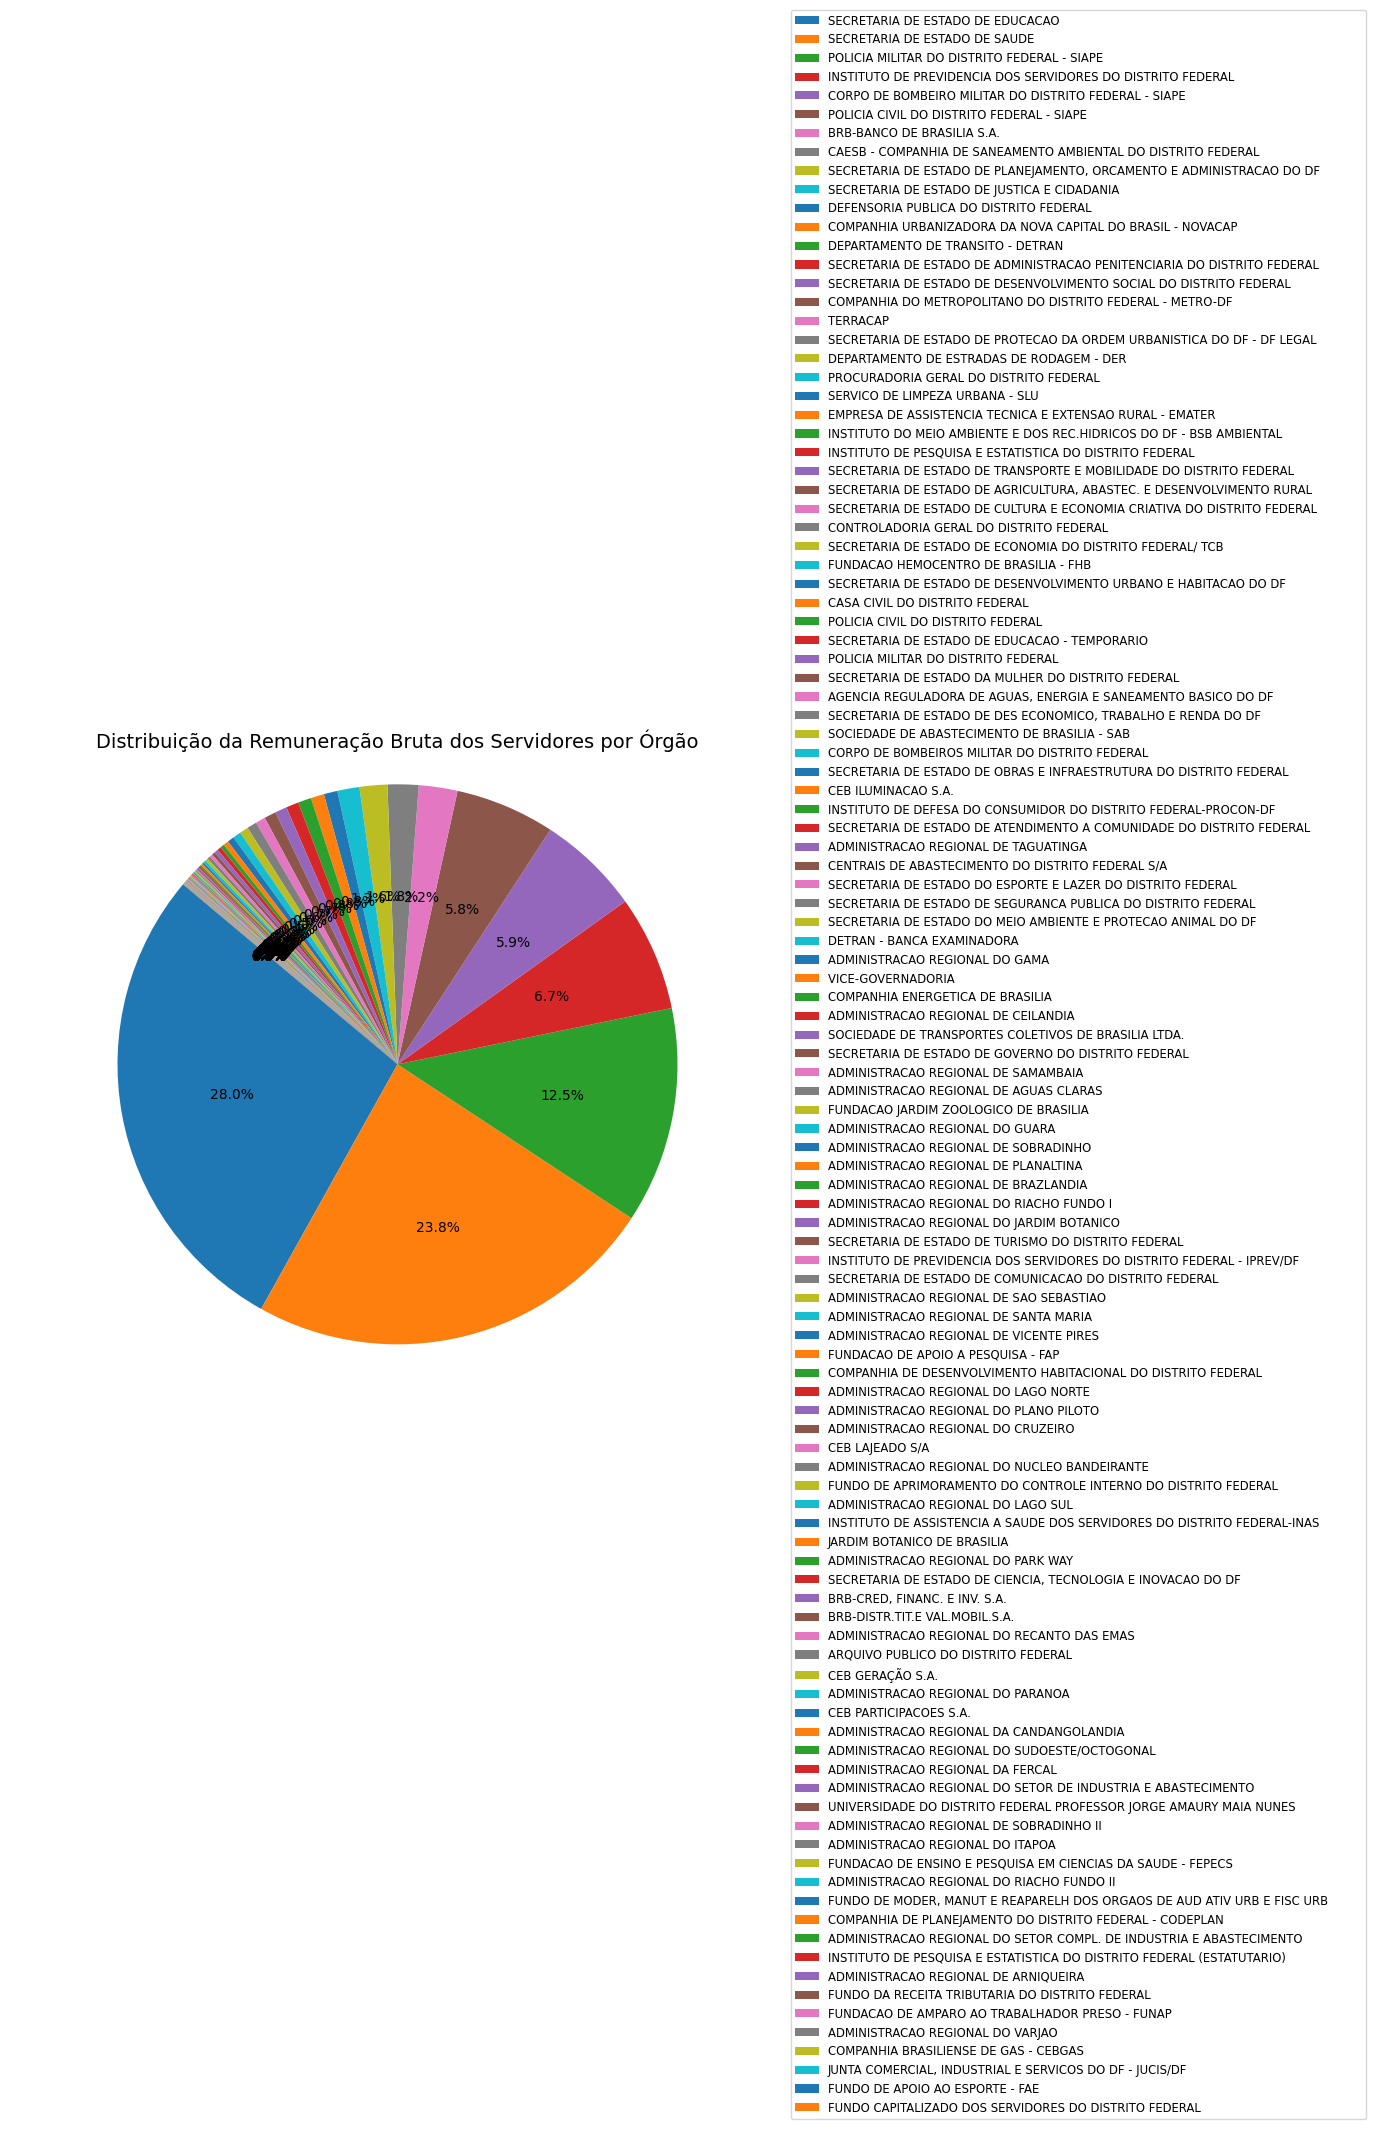

In [96]:

remuneracao_por_orgao = df_servidores.groupby('ÓRGÃO')['BRUTO'].sum()
remuneracao_por_orgao_sorted = remuneracao_por_orgao.sort_values(ascending=False)


plt.figure(figsize=(10, 8))
patches, texts, autotexts = plt.pie(remuneracao_por_orgao_sorted, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 10})
plt.title('Distribuição da Remuneração Bruta dos Servidores por Órgão', fontsize=14)
plt.axis('equal')

# Adicionar os nomes dos órgãos diretamente no gráfico
plt.legend(remuneracao_por_orgao_sorted.index, loc='center left', fontsize='small', bbox_to_anchor=(1, 0.5))

plt.show()


10) Elabore um gráfico de boxplot com a situação do servidor e sua remuneração liquida

C:\Users\galva\AppData\Local\Temp\ipykernel_9696\897966049.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_boxplot, x='SITUAÇÃO', y='LÍQUIDO', palette='Set3')


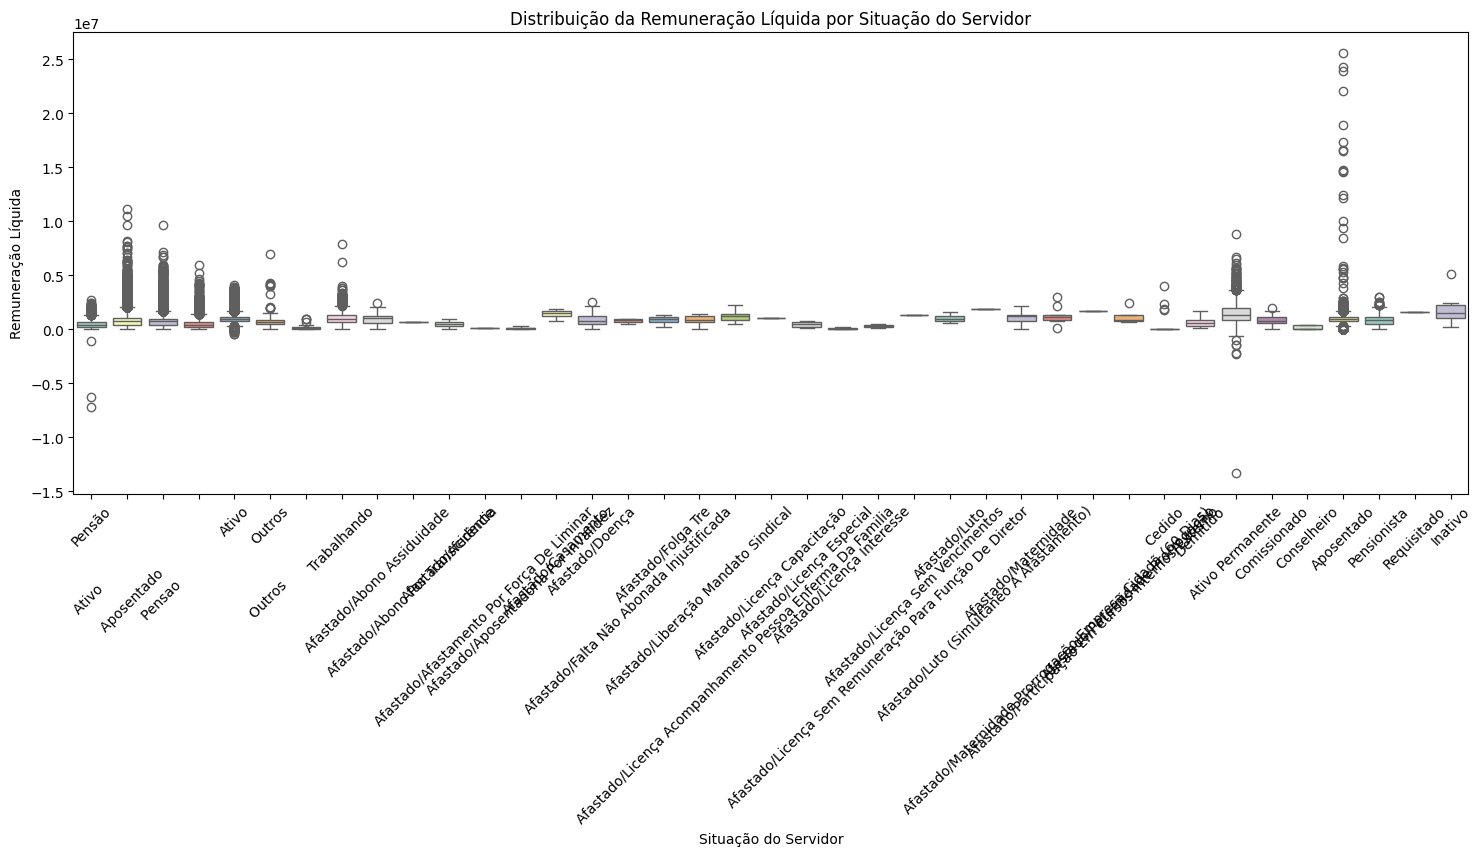

In [97]:
df_servidores.columns = df_servidores.columns.str.strip()
data_boxplot = df_servidores.copy()
data_boxplot['SITUAÇÃO'] = data_boxplot['SITUAÇÃO'].str.title()
plt.figure(figsize=(18, 6))
sns.boxplot(data=data_boxplot, x='SITUAÇÃO', y='LÍQUIDO', palette='Set3')
plt.title('Distribuição da Remuneração Líquida por Situação do Servidor')
plt.xlabel('Situação do Servidor')
plt.ylabel('Remuneração Líquida')
plt.xticks(rotation=45)
plt.show()

11) Identifique qual órgão possui salário liquido com menos variações, utilizando para isto medidas de dispersão.

In [98]:
variancia_por_orgao = df_servidores.groupby('ÓRGÃO')['LÍQUIDO'].var()
orgao_menos_variacao = variancia_por_orgao.idxmin()
print("Órgão com menor variação salarial líquida:", orgao_menos_variacao)

Órgão com menor variação salarial líquida: FUNDO DE APOIO AO ESPORTE - FAE                                                 


12) Calcule o índice de correlação entre o IRRF e os salários liquido e bruto. Em qual dos casos o índice de correlação foi maior?

In [99]:
correlacao_irrf_salario_bruto = df_servidores['IRRF'].corr(df_servidores['BRUTO'])
correlacao_irrf_salario_liquido = df_servidores['IRRF'].corr(df_servidores['LÍQUIDO'])
print("Correlação entre IRRF e salário bruto:", correlacao_irrf_salario_bruto)
print("Correlação entre IRRF e salário líquido:", correlacao_irrf_salario_liquido)

if abs(correlacao_irrf_salario_bruto) > abs(correlacao_irrf_salario_liquido):
    print("A correlação entre IRRF e salário bruto é maior.")
else:
    print("A correlação entre IRRF e salário líquido é maior.")

Correlação entre IRRF e salário bruto: 0.726884356116073
Correlação entre IRRF e salário líquido: 0.6398721808476866
A correlação entre IRRF e salário bruto é maior.


13) Adicione uma nova coluna que irá conter a diferença entre o salario bruto e liquido, e responda as seguintes questões;
* Qual a correlação entre o IRRF pago e esta nova coluna?
* Qual órgão apresenta índice de correlação entre IRRF e diferença salarial maior?

In [103]:
# a) Calculando a correlação entre o IRRF e a diferença salarial
correlacao_irrf_diferenca = df_servidores['IRRF'].corr(df_servidores['DIFERENÇA'])
print("Correlação entre IRRF e diferença salarial:", correlacao_irrf_diferenca)

# b) Calculando a correlação entre IRRF e a diferença salarial por órgão
correlacao_irrf_diferenca_por_orgao = df_servidores.groupby('ÓRGÃO').apply(lambda x: x['IRRF'].corr(x['DIFERENÇA']))
orgao_maior_correlacao_irrf_diferenca = correlacao_irrf_diferenca_por_orgao.idxmax()
print("Órgão com maior correlação entre IRRF e diferença salarial:", orgao_maior_correlacao_irrf_diferenca)

Correlação entre IRRF e diferença salarial: 0.38106411025767356
Órgão com maior correlação entre IRRF e diferença salarial: BRB-DISTR.TIT.E VAL.MOBIL.S.A.


C:\Users\galva\AppData\Local\Temp\ipykernel_9696\3921305838.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlacao_irrf_diferenca_por_orgao = df_servidores.groupby('ÓRGÃO').apply(lambda x: x['IRRF'].corr(x['DIFERENÇA']))


# Observações Finais

Todo o trabalho deverá ser feito utilizando Python e Pandas, instalado localmente ou em nuvem. Pode ser utilizado a plataforma Google Colaboratory e todos os itens acima deverão ser demonstrados. NÃO SERÃO ACEITO APENAS AS RESPOSTAS AS PERGUNTAS. O aluno deverá apresentar todos os comandos utilizados para obter as informações solicitadas. O Excel poderá ser utilizado caso o aluno tenha preferencia mesmo.

O aluno deverá criar um relatório, em formato PDF, contendo as perguntas e a respostas, devidamente demonstradas, juntamente com o arquivo .ipynb ou xlsx

Não serão corrigidos trabalhos com formato diferente de PDF, ipynb ou xslx, como .ZIP,tar, ou imagens.